PAUL SENTONGO

In [14]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

DNA sequence classification is a task of predicting the class of a DNA sequence, given its nucleotide sequence. This is a challenging task, as DNA sequences are very long and complex. However, machine learning algorithms can be used to learn patterns in DNA sequences and classify them with high accuracy.

This project aims to develop a machine learning model to classify DNA sequences from humans, chimpanzees, and dogs. The dataset for this project will consist of DNA sequences from all three species, labeled with their corresponding species.

# Import Libraries 

In [15]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import plotly.graph_objects as go

import Bio
from Bio.Seq import Seq

from Bio import SeqIO
from collections import Counter
import glob
import os
from sklearn.model_selection import train_test_split


# Read the DNA text file into a DataFrame

In [16]:
# Read the text file into a DataFrame
human_df=pd.read_table('human.txt')
human_df.head()

,sequence,class
0,ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...,4
2,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
3,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
4,ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...,3


In [17]:
# Read the text file into a DataFrame
chimpanzee_df=pd.read_table('chimpanzee.txt')
chimpanzee_df.head()

,sequence,class
0,ATGCCCCAACTAAATACCGCCGTATGACCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTATTCGCTTCATTCGCTGCCCCCACAATCCTAG...,4
2,ATGGCCTCGCGCTGGTGGCGGTGGCGACGCGGCTGCTCCTGGAGGC...,4
3,ATGGCCTCGCGCTGGTGGCGGTGGCGACGCGGCTGCTCCTGGAGGC...,4
4,ATGGGCAGCGCCAGCCCGGGTCTGAGCAGCGTGTCCCCCAGCCACC...,6


In [18]:
# Read the text file into a DataFrame
dog_df=pd.read_table('dog.txt')
dog_df.head()

,sequence,class
0,ATGCCACAGCTAGATACATCCACCTGATTTATTATAATCTTTTCAA...,4
1,ATGAACGAAAATCTATTCGCTTCTTTCGCTGCCCCCTCAATAATAG...,4
2,ATGGAAACACCCTTCTACGGCGATGAGGCGCTGAGCGGCCTGGGCG...,6
3,ATGTGCACTAAAATGGAACAGCCCTTCTACCACGACGACTCATACG...,6
4,ATGAGCCGGCAGCTAAACAGAAGCCAGAACTGCTCCTTCAGTGACG...,0


# Let's see the percentage of presence of each class in the Human Dataframe 

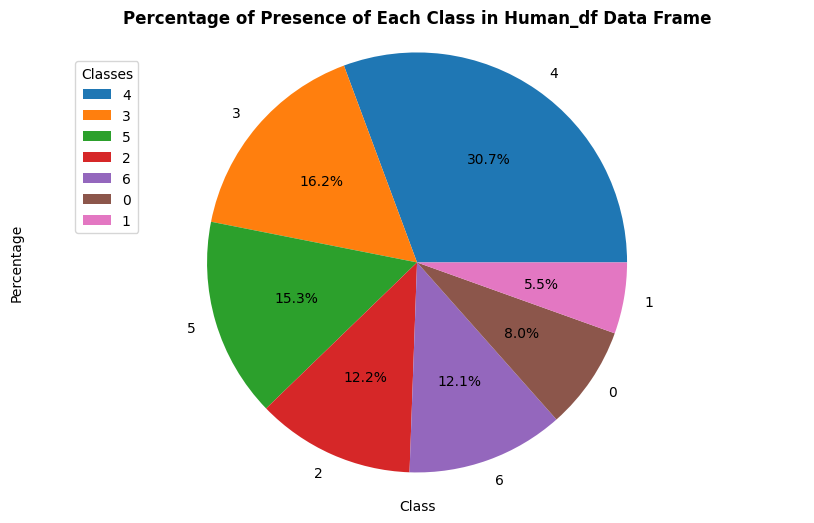

In [19]:
# Get the unique classes
classes = human_df['class'].unique()

# Count the number of sequences in each class
class_counts = human_df['class'].value_counts()

# Calculate the percentage of the presence of each class
class_percentages = class_counts / class_counts.sum() * 100

# Create a pie chart of the class percentages
plt.figure(figsize=(10, 6))
plt.pie(class_percentages, labels=classes, autopct="%1.1f%%")

# Customize the pie chart design
plt.title("Percentage of Presence of Each Class in Human_df Data Frame", fontweight="bold")
plt.xlabel("Class")
plt.ylabel("Percentage")
plt.axis("equal")  # Equal aspect ratio ensures that the pie chart is circular.
plt.legend(title="Classes", loc="upper left", bbox_to_anchor=(0.05, 0.95))

# Set the pie chart colors
plt.gca().set_prop_cycle(plt.cycler('color', ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']))

# Add a grid
plt.grid(True, color='lightgray', linestyle='--')

# Display the pie chart
plt.show()

# Comparing the Classes in the 3 Dataframe

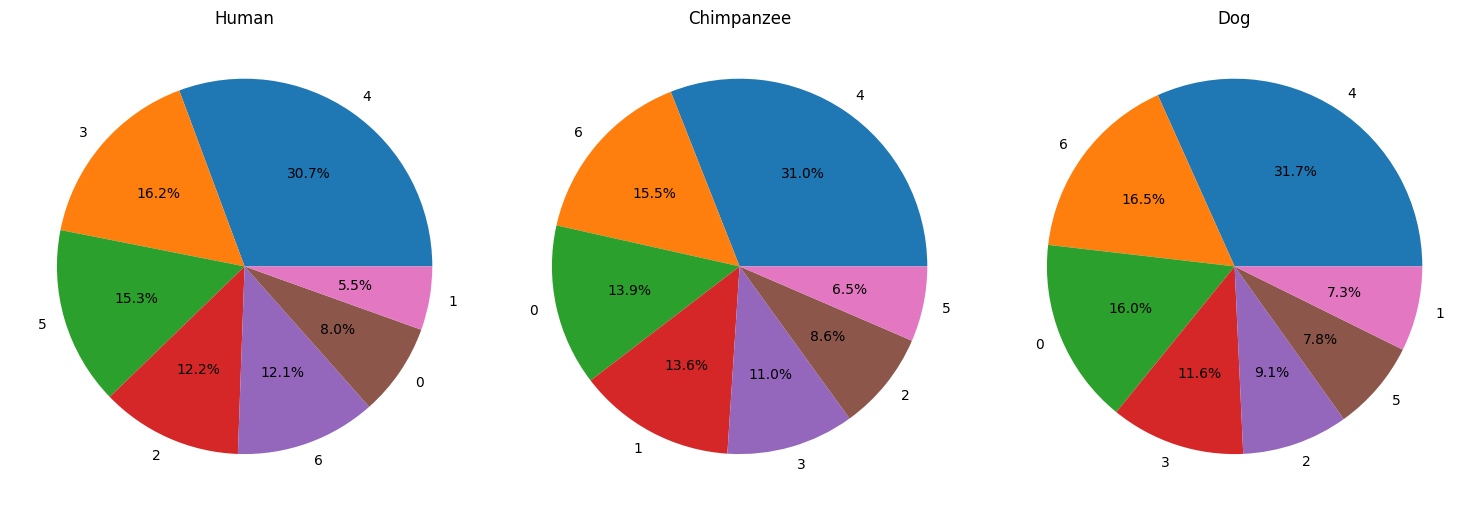

In [20]:

# Create a figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Get the unique classes in each data frame
human_classes = human_df['class'].unique()
chimpanzee_classes = chimpanzee_df['class'].unique()
dog_classes = dog_df['class'].unique()

# Count the number of sequences in each class in each data frame
human_class_counts = human_df['class'].value_counts()
chimpanzee_class_counts = chimpanzee_df['class'].value_counts()
dog_class_counts = dog_df['class'].value_counts()

# Calculate the percentage of the presence of each class in each data frame
human_class_percentages = human_class_counts / human_class_counts.sum() * 100
chimpanzee_class_percentages = chimpanzee_class_counts / chimpanzee_class_counts.sum() * 100
dog_class_percentages = dog_class_counts / dog_class_counts.sum() * 100

# Create pie charts of the class percentages in each subplot
axes[0].pie(human_class_percentages, labels=human_classes, autopct="%1.1f%%")
axes[1].pie(chimpanzee_class_percentages, labels=chimpanzee_classes, autopct="%1.1f%%")
axes[2].pie(dog_class_percentages, labels=dog_classes, autopct="%1.1f%%")

# Customize the pie chart design
axes[0].set_title("Human")
axes[1].set_title("Chimpanzee")
axes[2].set_title("Dog")

# Adjust the subplot layout
plt.tight_layout()

# Display the pie charts
plt.show()

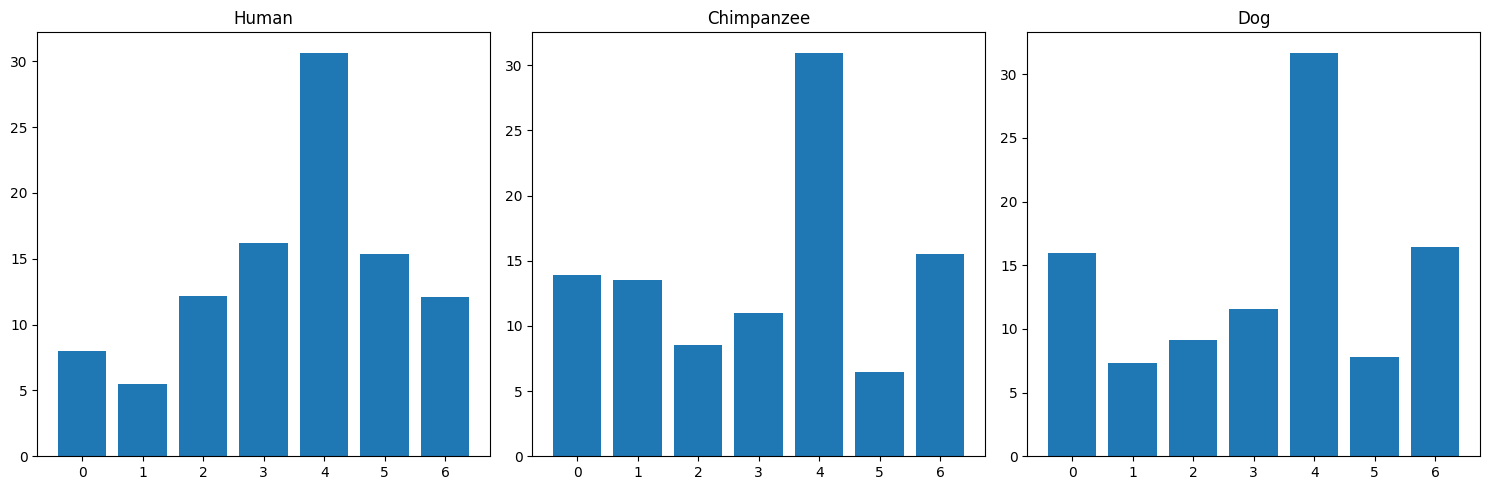

In [21]:
# Create a figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Create bar charts of the class percentages in each subplot
axes[0].bar(human_classes, human_class_percentages)
axes[1].bar(chimpanzee_classes, chimpanzee_class_percentages)
axes[2].bar(dog_classes, dog_class_percentages)

# Customize the bar chart design
axes[0].set_title("Human")
axes[1].set_title("Chimpanzee")
axes[2].set_title("Dog")

# Adjust the subplot layout
plt.tight_layout()

# Display the bar charts
plt.show()

# Top 10 6-Kmers and Their Percentage in the human_df

A K-mer (kmer) is a string of DNA when tokenized (e.g. 2 Kmer: TC, 3 kmer: AGC)

Another form of tokenizing

In [22]:
# Get the DNA sequences in the human_df data frame
sequences = human_df['sequence'].tolist()

# Create a dictionary to store the 6-kmers and their counts
kmer_counts = {}

# Iterate over the DNA sequences
for sequence in sequences:

    # Split the DNA sequence into 6-kmers
    kmers = [sequence[i:i+6] for i in range(0, len(sequence) - 5, 1)]

    # Add the 6-kmers to the dictionary
    for kmer in kmers:
        if kmer in kmer_counts:
            kmer_counts[kmer] += 1
        else:
            kmer_counts[kmer] = 1

# Sort the 6-kmers by their counts in descending order
sorted_kmers = sorted(kmer_counts.items(), key=lambda x: x[1], reverse=True)

# Get the top 10 6-kmers
top_10_kmers = sorted_kmers[:10]

# Calculate the percentage of the presence of each 6-kmer
top_10_kmer_percentages = [kmer[1] / sum(kmer_counts.values()) * 100 for kmer in top_10_kmers]

# Print the top 10 6-kmers and their percentage
print("Top 10 6-Kmers and Their Percentage")
print("----------------------------------")
for i in range(len(top_10_kmers)):
    print(f"{top_10_kmers[i][0]}: {top_10_kmer_percentages[i]:.1f}%")

Top 10 6-Kmers and Their Percentage
----------------------------------
CAGCAG: 0.1%
CTGCTG: 0.1%
AGAAGA: 0.1%
CTGGAG: 0.1%
GAAGAA: 0.1%
CTGCAG: 0.1%
GAGGAG: 0.1%
AAGAAG: 0.1%
CCTGGA: 0.1%
GGAGGA: 0.1%


* Define a function to collect all possible overlapping k-mers ,  k-mer as a short word that is extracted from a sequence string. Overlapping k-mers are created by sliding a window of a certain size over the sequence string, one character at a time. The convert_to_kmers() function converts a list of sequence strings into a list of lists of overlapping k-mers of a specified length. 
* To convert training data sequences into short overlapping k-mers of length 6, we can use the following code:



In [23]:
def getKmers(sequence, size=6):
    return [sequence[x:x+size].lower() for x in range(len(sequence) - size + 1)]

human_df['words'] = human_df.apply(lambda x: getKmers(x['sequence']), axis=1)
human_df = human_df.drop('sequence', axis=1)

chimpanzee_df['words'] = chimpanzee_df.apply(lambda x: getKmers(x['sequence']), axis=1)
chimpanzee_df = chimpanzee_df.drop('sequence', axis=1)

dog_df['words'] = dog_df.apply(lambda x: getKmers(x['sequence']), axis=1)
dog_df = dog_df.drop('sequence', axis=1)

human_df

,class,words
0,4,"[atgccc, tgcccc, gcccca, ccccaa, cccaac, ccaac..."
1,4,"[atgaac, tgaacg, gaacga, aacgaa, acgaaa, cgaaa..."
2,3,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca..."
3,3,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca..."
4,3,"[atgcaa, tgcaac, gcaaca, caacag, aacagc, acagc..."
...,...,...
4375,0,"[atggaa, tggaag, ggaaga, gaagat, aagatt, agatt..."
4376,6,"[atgcag, tgcagt, gcagtc, cagtcc, agtcct, gtcct..."
4377,6,"[atgcag, tgcagt, gcagtc, cagtcc, agtcct, gtcct..."
4378,6,"[atgggg, tggggc, ggggca, gggcac, ggcacc, gcacc..."


*  We need to convert the lists of k-mers for each gene into string sentences of words that can be used to create the Bag of Words model. 

In [24]:
human_texts = list(human_df['words'])
for item in range(len(human_texts)):
    human_texts[item] = ' '.join(human_texts[item])
y_data = human_df.iloc[:, 0].values 

In [25]:
chimp_texts = list(chimpanzee_df['words'])
for item in range(len(chimp_texts)):
    chimp_texts[item] = ' '.join(chimp_texts[item])
y_chimp = chimpanzee_df.iloc[:, 0].values                      

dog_texts = list(dog_df['words'])
for item in range(len(dog_texts)):
    dog_texts[item] = ' '.join(dog_texts[item])
y_dog = dog_df.iloc[:, 0].values


* An n-gram is a sequence of n consecutive words or tokens. In the context of natural language processing (NLP), n-grams are used to capture the context of words in a sentence. For example, the 2-gram "I love" is more informative than the unigram "I" because it tells us that the word "I" is often followed by the word "love".

* In this case, we are setting the ngram_range to (4, 4). This means that the CountVectorizer will create features for all 4-grams (sequences of 4 consecutive words) in the text.

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(4,4))
X = cv.fit_transform(human_texts)
X_chimp = cv.transform(chimp_texts)
X_dog = cv.transform(dog_texts)

* We will use the human data to train a machine learning model to predict sequence function. We will train the model on 80% of the human data and then evaluate its performance on the remaining 20% of the data.

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_data, test_size = 0.20, random_state=32)

In [28]:
print(X_train.shape)
print(X_test.shape)

(3504, 232414)
(876, 232414)


In [29]:
from sklearn.model_selection import cross_val_score

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.naive_bayes import MultinomialNB
from sklearn import svm


Here we will apply SVMs , A  machine learning algorithm that can be used for both classification and regression tasks. SVMs work by finding a hyperplane in the data that separates the data points into two classes. The hyperplane is a flat surface that divides the data space into two parts.



In [30]:
svm_clf = svm.SVC(kernel='rbf', C=1, random_state=0)
svm_clf.fit(X_train,y_train)
predicted = svm_clf.predict(X_test)
score = svm_clf.score(X_test, y_test)
svm_score_ = np.mean(score)

print('Accuracy : %.3f' % (svm_score_))

Accuracy : 0.820


* Let's make a confusion matrix that summarizes the performance of a classification model. It shows the number of correct predictions and incorrect predictions for each class and calculate the Accuracy, Precision , Recall and F1 score.



In [31]:
y_true = y_test
y_pred = predicted

confusion_matrix = confusion_matrix(y_true, y_pred)

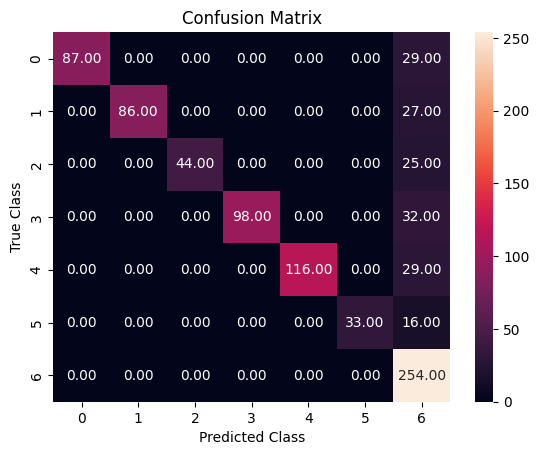

In [32]:
import seaborn as sns

sns.heatmap(confusion_matrix, annot=True, fmt='.2f')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix')
plt.show()

In [33]:
from sklearn.metrics import precision_score, recall_score, f1_score


def calculate_metrics(y_true, y_pred):
  """Calculates the precision, recall, and F1 score of a multiclass classification model.

  Args:
    y_true: The true class labels of the data samples.
    y_pred: The predicted class labels of the data samples.

  Returns:
    A tuple containing the precision, recall, and F1 score of the classification model.
  """

  precision = precision_score(y_true, y_pred, average='weighted')
  recall = recall_score(y_true, y_pred, average='weighted')

  return precision, recall

# Calculate the precision and recall of the classification model.
precision, recall = calculate_metrics(y_true, y_pred)

# Calculate the F1 score with the weighted averaging setting.
f1_score = f1_score(y_true, y_pred, average='weighted')

# Print the result.
# Print the results.
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1_score)

Precision: 0.8888039189608546
Recall: 0.819634703196347
F1 score: 0.8272322687183075


* MultinomialNB(alpha=0.1) creates a new multinomial Naive Bayes classifier with the alpha parameter set to 0.1. The alpha parameter controls the amount of smoothing that is applied to the data. Smoothing is a technique that is used to prevent the classifier from overfitting to the training data.

* classifier.fit(x_train, y_train) trains the classifier on the training data. The x_train parameter is a NumPy array containing the training data features. The y_train parameter is a NumPy array containing the training data labels.

* Once the classifier is trained, it can be used to predict the labels of new data points. To do this, you would use the classifier.predict() method

In [34]:
classifier = MultinomialNB(alpha=0.1)
classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.1)

In [35]:
predicted = classifier.predict(X_test)

In [36]:
y_pred2 = classifier.predict(X_test)

In [37]:

# Print the confusion matrix.
print("Confusion matrix\n")
print(pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_pred2, name='Predicted')))


Confusion matrix

Predicted    0    1   2    3    4   5    6
Actual                                    
0          114    0   0    0    0   0    2
1            0  112   0    0    0   0    1
2            0    0  67    0    0   0    2
3            0    0   0  128    1   0    1
4            4    0   0    0  136   0    5
5            7    0   0    0    0  41    1
6            0    0   0    1    0   1  252
